# Decision Trees

In this lab exercise, you will learn a popular machine learning algorithm, Decision Trees. You will use this classification algorithm to build a model from the historical data of patients, and their response to different medications. Then you will use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.


In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
path = './drug200.csv'

df = pd.read_csv(path)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<div id="practice"> 
    <h3>Practice</h3> 
    What is the size of data? 
</div>


In [3]:
df.shape

(200, 6)

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>df</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


In [4]:
X = df.iloc[:, :5].values
X[:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Convert categorical data to numerical data using LabelEncoder.

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#Encoding Sex
le.fit(['F', 'M'])
X[:,1] = le.fit_transform(X[:,1])


In [6]:
#Encoding BP
le.fit(['HIGH', 'LOW', 'NORMAL'])
X[:,2] = le.fit_transform(X[:,2])


In [7]:
#encoding cholestrol
le.fit(['NORMAL', 'HIGH'])
X[:,3] = le.fit_transform(X[:,3])

X[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Filling target variable

In [8]:
y = df.iloc[:,-1].values
y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,
                                                test_size=.2,
                                                random_state=3)

In [10]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 5) (160,)
(40, 5) (40,)


<hr>

<div id="modeling">
    <h2>Modeling & Prediction</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [20]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=6)

drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [21]:
drugTree.fit(x_train, y_train)
yhat = drugTree.predict(x_test)

In [22]:
print(y_test[:5],'\n',yhat[:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX'] 
 ['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [23]:
from sklearn.metrics import accuracy_score as acs

print('Accuracy of decision tree is:', acs(y_test, yhat))

Accuracy of decision tree is: 1.0


The accuracy of decision tree is **100%** in our case

**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


<hr>

<div id="visualization">
    <h2>Visualization</h2>

Let's visualize the tree

</div>


In [24]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt

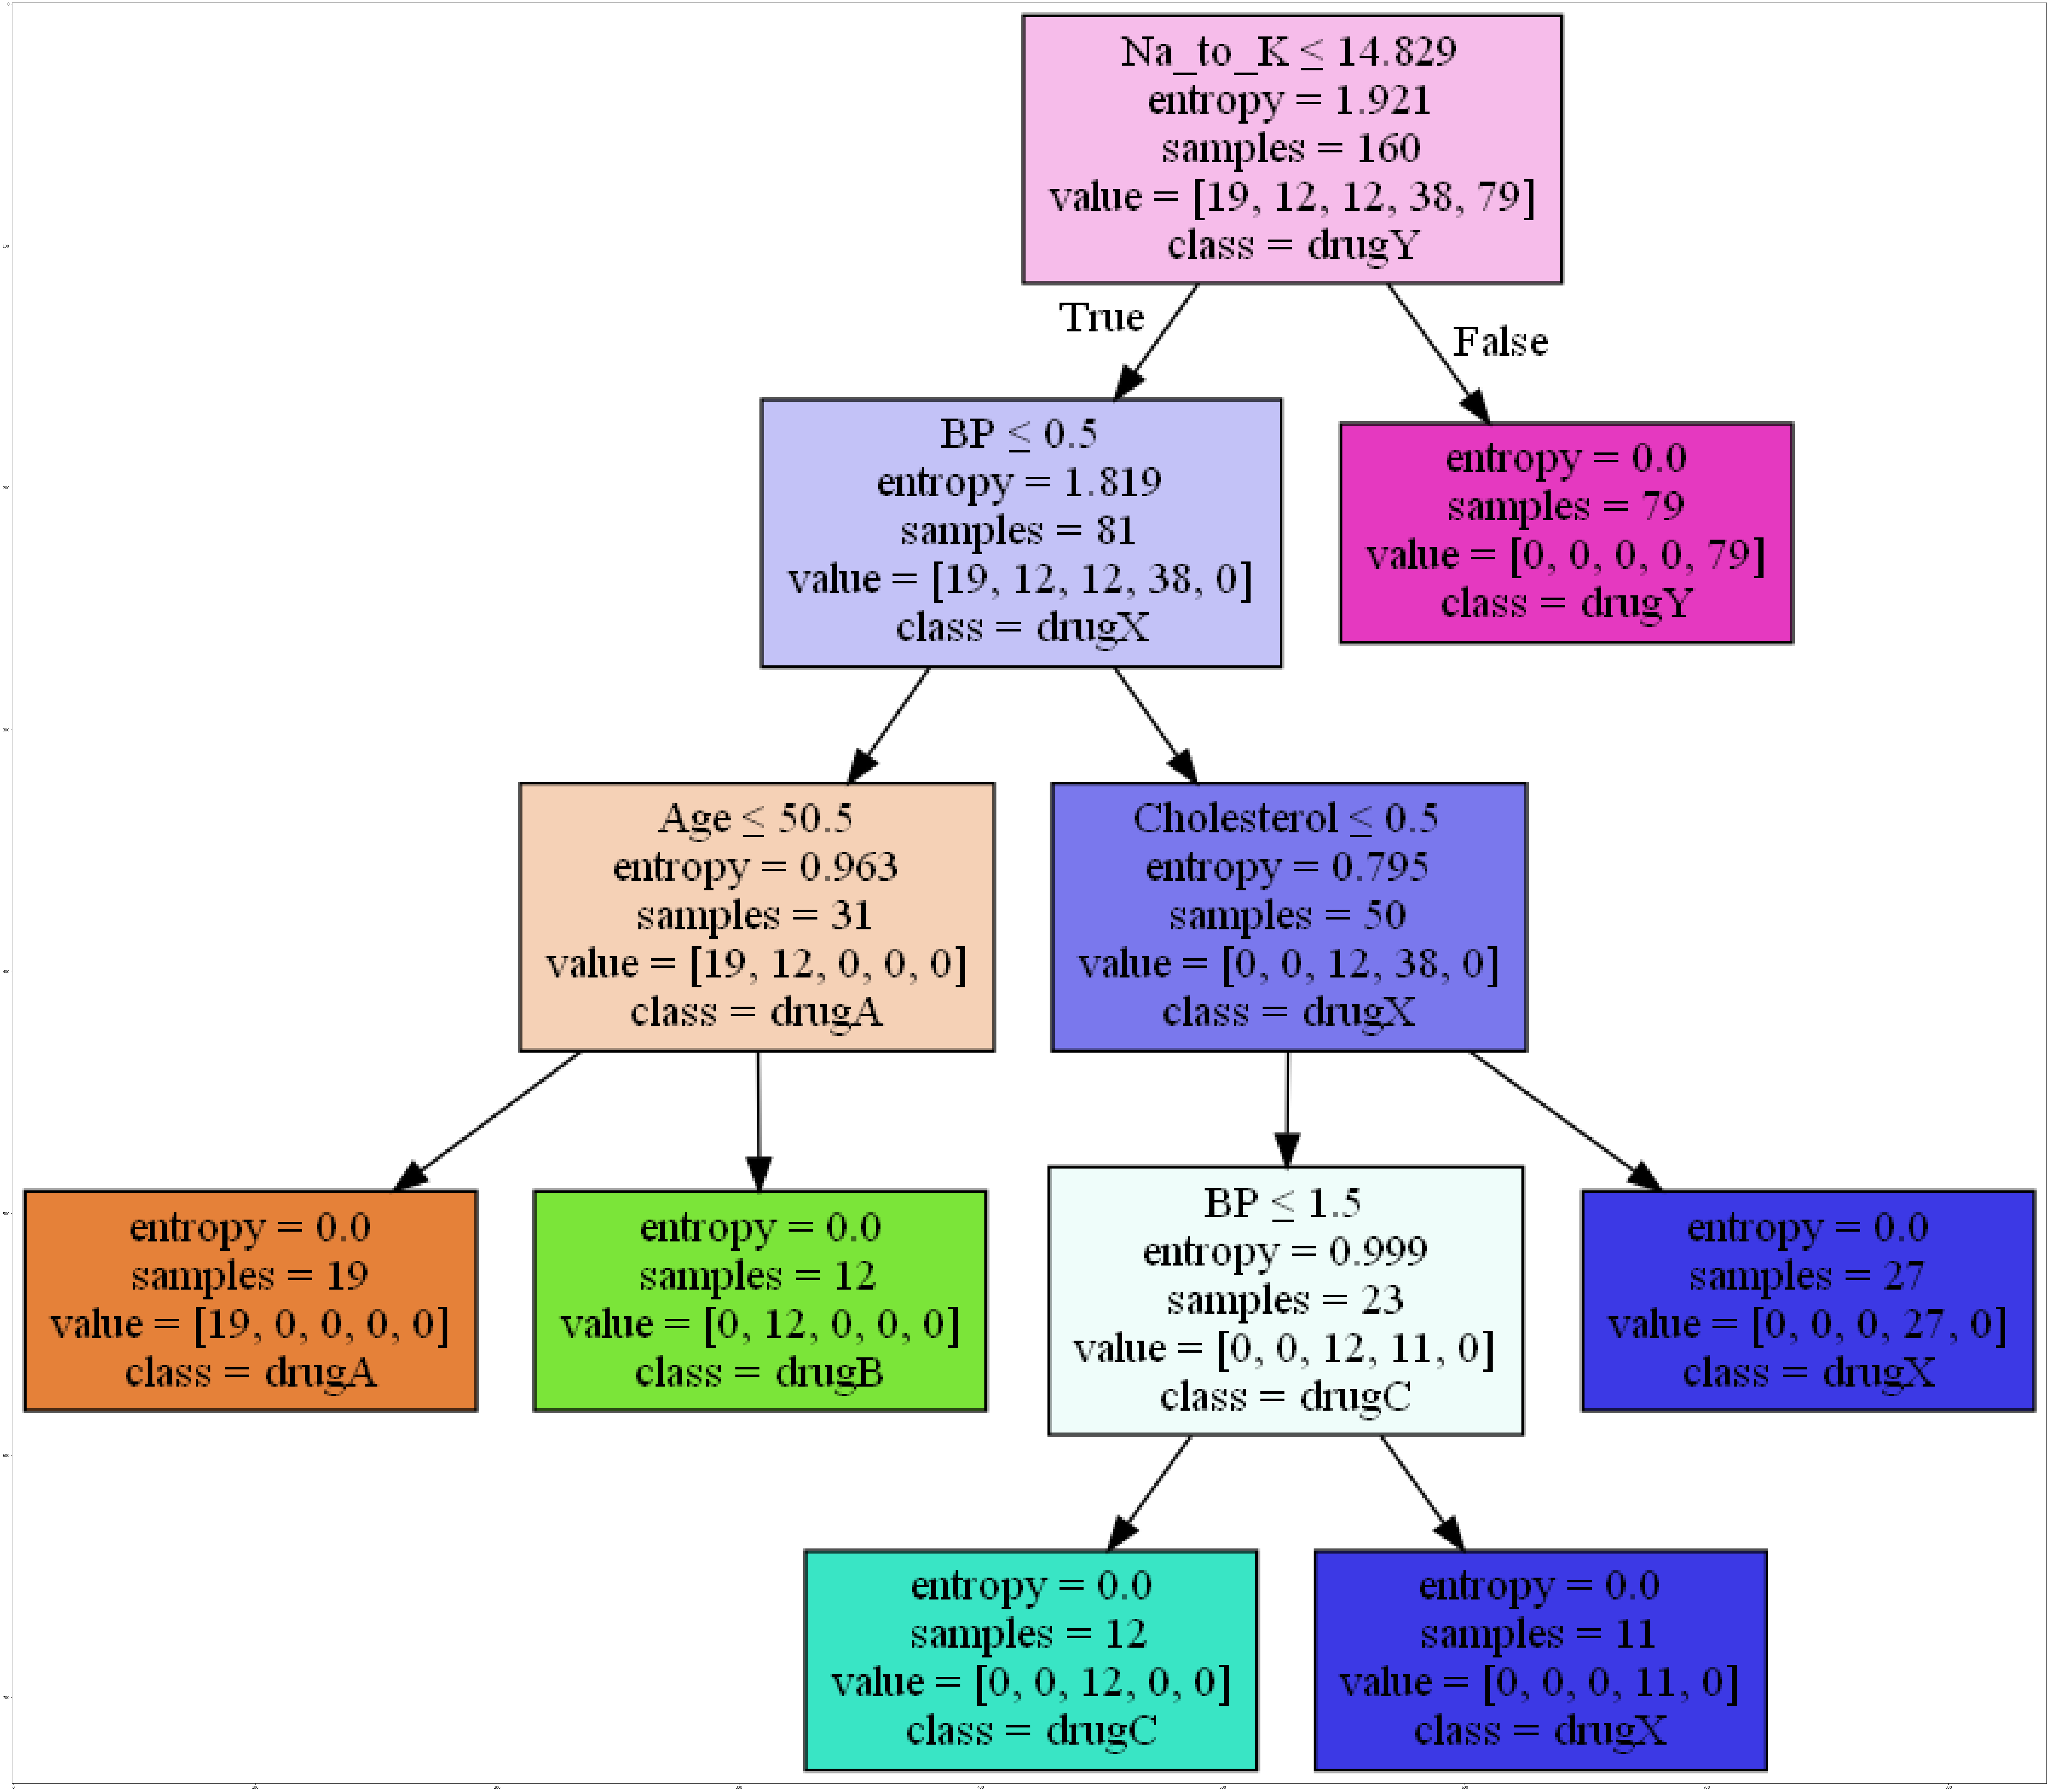

In [25]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img)